# AutoEncoder
## Unsupervised Learning

In [0]:
# 입력값과 출력값을 같게 하는 신경망
# -> 입력데이터의 압축효과 -> 노이즈 제거에 효과적

# Variational Autoencoder
# Denoising Autoencoder

In [0]:
import random as rd
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt
from tensorflow.examples.tutorials.mnist import input_data

In [3]:
mnist = input_data.read_data_sets("./mnist/data/", one_hot=True)

LEARN_RATE = 1e-2
EPOCH_SIZE = 20
BATCH_SIZE = 100
NUM_HIDDEN = 256
NUM_INPUT  = 28 * 28

Instructions for updating:
Please use alternatives such as official/mnist/dataset.py from tensorflow/models.
Instructions for updating:
Please write your own downloading logic.
Instructions for updating:
Please use urllib or similar directly.
Successfully downloaded train-images-idx3-ubyte.gz 9912422 bytes.
Instructions for updating:
Please use tf.data to implement this functionality.
Extracting ./mnist/data/train-images-idx3-ubyte.gz
Successfully downloaded train-labels-idx1-ubyte.gz 28881 bytes.
Instructions for updating:
Please use tf.data to implement this functionality.
Extracting ./mnist/data/train-labels-idx1-ubyte.gz
Instructions for updating:
Please use tf.one_hot on tensors.
Successfully downloaded t10k-images-idx3-ubyte.gz 1648877 bytes.
Extracting ./mnist/data/t10k-images-idx3-ubyte.gz
Successfully downloaded t10k-labels-idx1-ubyte.gz 4542 bytes.
Extracting ./mnist/data/t10k-labels-idx1-ubyte.gz
Instructions for updating:
Please use alternatives such as official/mnist/datas

In [4]:
with tf.device('/device:GPU:0'):
  with tf.variable_scope('AutoEncoder'):
    x = tf.placeholder(tf.float32, shape=[None, NUM_INPUT], name = 'input_x')
    keep_prob = tf.placeholder(tf.float32, name="prob")
    
    with tf.name_scope("Encoder"):
      W_encode = tf.get_variable('W_encode', shape=[NUM_INPUT, NUM_HIDDEN],
                                  initializer = tf.keras.initializers.he_normal())
      b_encode = tf.Variable(tf.random_normal([NUM_HIDDEN]))

      encoder = tf.nn.relu(tf.add(tf.matmul(x, W_encode), b_encode))
      encoder = tf.nn.dropout(encoder, keep_prob)
    
    with tf.name_scope("Decoder"):
      W_decode = tf.get_variable('W_decode', shape=[NUM_HIDDEN, NUM_INPUT], 
                                  initializer = tf.keras.initializers.he_normal())
      b_decode = tf.Variable(tf.random_normal([NUM_INPUT]))
      decoder = tf.nn.relu(tf.add(tf.matmul(encoder, W_decode), b_decode))
      decoder = tf.nn.dropout(decoder, keep_prob)
      
    with tf.name_scope("Cost"):
      cost = tf.reduce_mean(tf.pow(tf.subtract(x, decoder), 2))
    
    with tf.name_scope("Train"):
      optimizer = tf.train.RMSPropOptimizer(LEARN_RATE, epsilon=1e-5, momentum=0.9).minimize(cost)

Instructions for updating:
Colocations handled automatically by placer.
Instructions for updating:
Please use `rate` instead of `keep_prob`. Rate should be set to `rate = 1 - keep_prob`.


In [0]:
def normalization(data, momentum=0.99, epsilon=1e-4):
  mean = np.mean(data)
  variance = np.var(data)
  
  return momentum * ((data - mean) / np.sqrt(variance**2 + 1e-5)) + epsilon

Epoch: 1    Avg_Cost: 0.10227839421142232


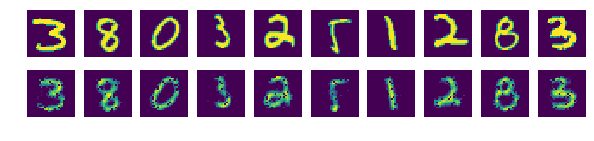

Epoch: 2    Avg_Cost: 0.048456550992347976


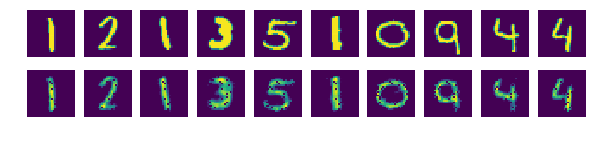

Epoch: 3    Avg_Cost: 0.044596859873695806


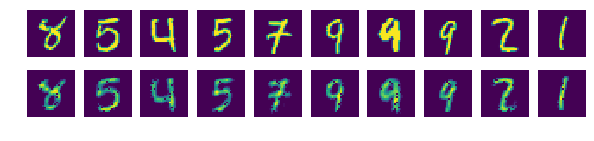

Epoch: 4    Avg_Cost: 0.04196298973126845


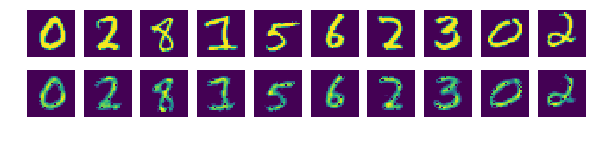

Epoch: 5    Avg_Cost: 0.0408062682910399


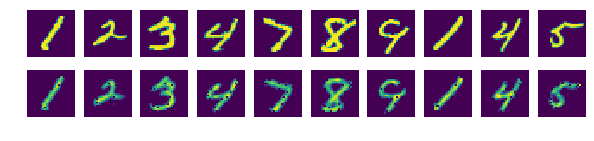

Epoch: 6    Avg_Cost: 0.03999146447940306


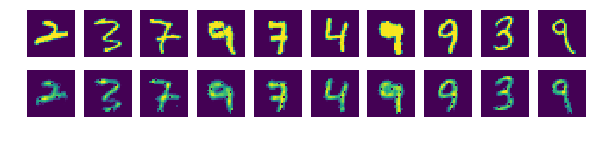

Epoch: 7    Avg_Cost: 0.03933608305047859


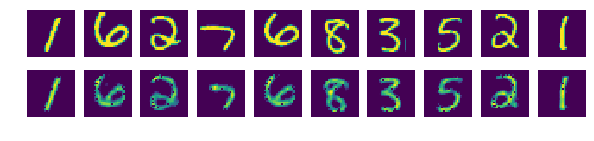

Epoch: 8    Avg_Cost: 0.039071180265058174


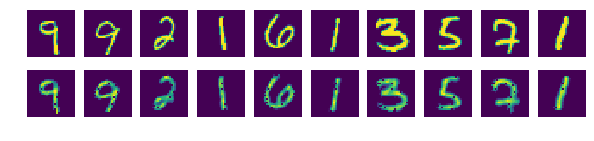

Epoch: 9    Avg_Cost: 0.03861887480047616


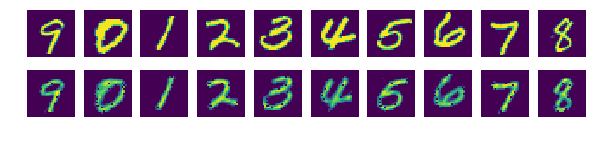

Epoch: 10    Avg_Cost: 0.038396011286161165


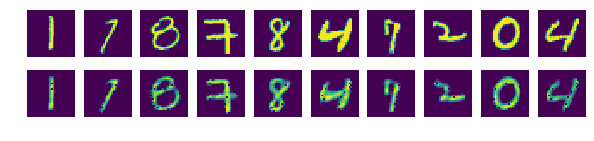

Epoch: 11    Avg_Cost: 0.03783123583956198


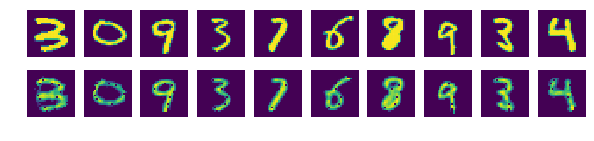

Epoch: 12    Avg_Cost: 0.0374321309748021


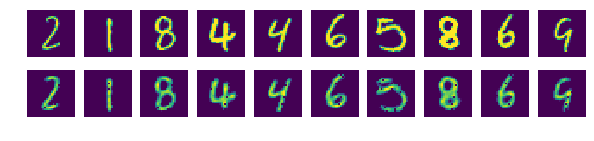

Epoch: 13    Avg_Cost: 0.037332742911848155


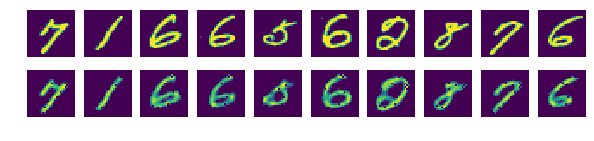

Epoch: 14    Avg_Cost: 0.03673741793090647


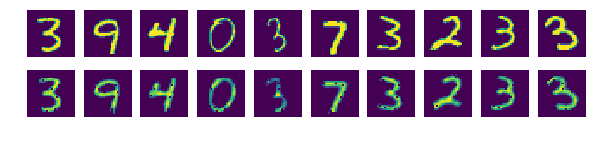

Epoch: 15    Avg_Cost: 0.03623420736329122


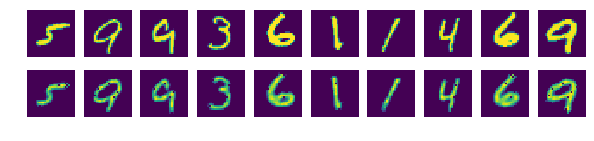

Epoch: 16    Avg_Cost: 0.03578913016752763


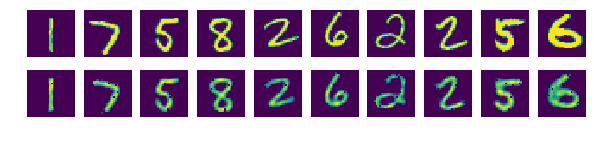

Epoch: 17    Avg_Cost: 0.03578941847790371


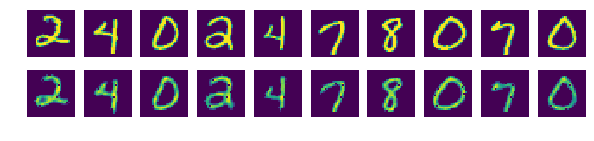

Epoch: 18    Avg_Cost: 0.035541283349421894


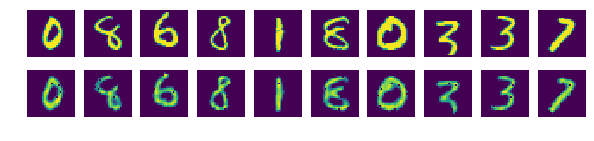

Epoch: 19    Avg_Cost: 0.03543106272816658


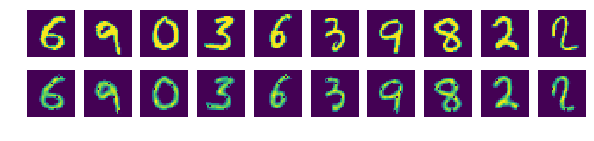

Epoch: 20    Avg_Cost: 0.035221343697472055


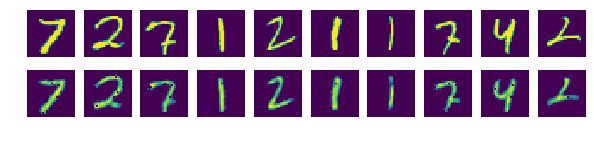

Optimizing Done!


In [7]:
TOTAL_BATCH = int(mnist.train.num_examples / BATCH_SIZE)

init = tf.global_variables_initializer()
sess = tf.Session()

sess.run(init)

for epoch in range(EPOCH_SIZE):
  total_cost = 0
  
  for i in range(TOTAL_BATCH):
    batch_xs, batch_ys = mnist.train.next_batch(BATCH_SIZE)
#     batch_xs = normalization(batch_xs)
    
    feed = {
        x: batch_xs,
        keep_prob: 0.8
    }
    
    _, cost_val = sess.run([optimizer, cost], feed)
    total_cost += cost_val
  print("Epoch: {}    Avg_Cost: {}".format(epoch+1, total_cost/TOTAL_BATCH))
  
  SAMPLE_SIZE = 10
  RANDOM_N = rd.randint(0, 9989)

  x_test = mnist.test.images[RANDOM_N: RANDOM_N + SAMPLE_SIZE]
  # x_test = normalization(x_test)

  sample = sess.run(decoder, {x:x_test, keep_prob:1.0})
  labels = mnist.test.images[RANDOM_N: RANDOM_N + SAMPLE_SIZE]
  fig, ax = plt.subplots(2, SAMPLE_SIZE, figsize=(SAMPLE_SIZE, 2))

  for i in range(SAMPLE_SIZE):
    ax[0][i].set_axis_off()
    ax[1][i].set_axis_off()

    ax[0][i].imshow(np.reshape(labels[i], (28, 28)))
    ax[1][i].imshow(np.reshape(sample[i], (28, 28)))

  plt.show()
  
print("Optimizing Done!")

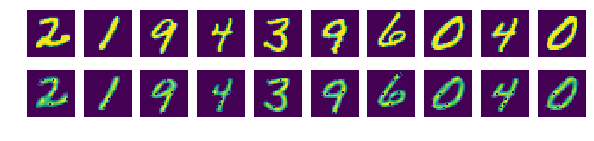

In [0]:
SAMPLE_SIZE = 10
RANDOM_N = rd.randint(0, 9989)

x_test = mnist.test.images[RANDOM_N: RANDOM_N + SAMPLE_SIZE]
# x_test = normalization(x_test)

sample = sess.run(decoder, {x:x_test, keep_prob:1.0})
labels = mnist.test.images[RANDOM_N: RANDOM_N + SAMPLE_SIZE]
fig, ax = plt.subplots(2, SAMPLE_SIZE, figsize=(SAMPLE_SIZE, 2))

for i in range(SAMPLE_SIZE):
  ax[0][i].set_axis_off()
  ax[1][i].set_axis_off()
  
  ax[0][i].imshow(np.reshape(labels[i], (28, 28)))
  ax[1][i].imshow(np.reshape(sample[i], (28, 28)))
  
plt.show()

In [0]:
with tf.device('/device:GPU:0'):
  with tf.variable_scope('AutoEncoder'):
    x = tf.placeholder(tf.float32, shape=[None, NUM_INPUT], name = 'input_x')
    keep_prob = tf.placeholder(tf.float32, name="prob")
    
    with tf.name_scope("Encoder"):
      encoder = tf.keras.layers.Dense(NUM_HIDDEN, activation=tf.nn.relu)(x)
    
    with tf.name_scope("Decoder"):
      decoder = tf.keras.layers.Dense(NUM_INPUT, activation=tf.nn.relu)(encoder)
      
    with tf.name_scope("Cost"):
      cost = tf.reduce_mean(tf.pow(tf.subtract(x, decoder), 2))
    
    with tf.name_scope("Train"):
      optimizer = tf.train.RMSPropOptimizer(LEARN_RATE, epsilon=1e-5, momentum=0.9).minimize(cost)

Instructions for updating:
Colocations handled automatically by placer.


In [0]:
pip install --upgrade keras

Requirement already up-to-date: keras in /usr/local/lib/python3.6/dist-packages (2.2.4)


In [0]:
TOTAL_BATCH = int(mnist.train.num_examples / BATCH_SIZE)

init = tf.global_variables_initializer()
sess = tf.Session()

sess.run(init)

for epoch in range(EPOCH_SIZE):
  total_cost = 0
  
  for i in range(TOTAL_BATCH):
    batch_xs, batch_ys = mnist.train.next_batch(BATCH_SIZE)
#     batch_xs = normalization(batch_xs)
    
    feed = {
        x: batch_xs,
        keep_prob: 0.8
    }
    
    _, cost_val = sess.run([optimizer, cost], feed)
    total_cost += cost_val
  print("Epoch: {}    Avg_Cost: {}".format(epoch+1, total_cost/TOTAL_BATCH))

print("Optimizing Done!")

Epoch: 1    Avg_Cost: 0.02801876801489429
Epoch: 2    Avg_Cost: 0.008124245580455118
Epoch: 3    Avg_Cost: 0.007083844997158105
Epoch: 4    Avg_Cost: 0.006464255458929322
Epoch: 5    Avg_Cost: 0.006201913238249042
Epoch: 6    Avg_Cost: 0.006028982201929797
Epoch: 7    Avg_Cost: 0.005887864339588718
Epoch: 8    Avg_Cost: 0.0057708047431978314
Epoch: 9    Avg_Cost: 0.005694117555394769
Epoch: 10    Avg_Cost: 0.005636609206822785
Epoch: 11    Avg_Cost: 0.005549890412525697
Epoch: 12    Avg_Cost: 0.005466453876685012
Epoch: 13    Avg_Cost: 0.005436151423068209
Epoch: 14    Avg_Cost: 0.0054165754822844804
Epoch: 15    Avg_Cost: 0.005396773627197201
Epoch: 16    Avg_Cost: 0.005381179777905345
Epoch: 17    Avg_Cost: 0.005366474742239172
Epoch: 18    Avg_Cost: 0.005348415531387383
Epoch: 19    Avg_Cost: 0.005328720526092432
Epoch: 20    Avg_Cost: 0.005316861880604516
Optimizing Done!


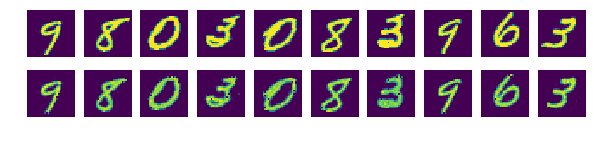

In [0]:
SAMPLE_SIZE = 10
RANDOM_N = rd.randint(0, 9989)

x_test = mnist.test.images[RANDOM_N: RANDOM_N + SAMPLE_SIZE]
# x_test = normalization(x_test)

sample = sess.run(decoder, {x:x_test, keep_prob:1.0})
labels = mnist.test.images[RANDOM_N: RANDOM_N + SAMPLE_SIZE]
fig, ax = plt.subplots(2, SAMPLE_SIZE, figsize=(SAMPLE_SIZE, 2))

for i in range(SAMPLE_SIZE):
  ax[0][i].set_axis_off()
  ax[1][i].set_axis_off()
  
  ax[0][i].imshow(np.reshape(labels[i], (28, 28)))
  ax[1][i].imshow(np.reshape(sample[i], (28, 28)))
  
plt.show()